# Startup success rate prediction
Exploring startup success prediction using a Random Forest model, visualizing data with charts to gain insights into key factors

In [1]:
# Importing libreries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#readind data
data= pd.read_csv("startup data.csv")
print("Shape of Data: ", data.shape)

Shape of Data:  (923, 49)


In [3]:
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [5]:
data["first_funding_at"]= pd.to_datetime(data["first_funding_at"])
data["last_funding_at"]= pd.to_datetime(data["last_funding_at"])
data["founded_at"]= pd.to_datetime(data["founded_at"])
data["closed_at"]= pd.to_datetime(data["closed_at"])

In [6]:
print(data.columns)

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')


Here, We can see the dataset contains both columns i.e. categorical and encoded. 

In [7]:
# Drop irrelevant columns 
data.drop(columns=['Unnamed: 0', 'Unnamed: 6', 'id', 'object_id'], inplace=True)

### EDA and data visualization

In [8]:
# Checking Data Statistics
print(data.describe(include="all"))


C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_12396\504301918.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(data.describe(include="all"))
C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_12396\504301918.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(data.describe(include="all"))
C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_12396\504301918.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the 

       state_code    latitude   longitude zip_code           city  \
count         923  923.000000  923.000000      923            923   
unique         35         NaN         NaN      382            221   
top            CA         NaN         NaN    94107  San Francisco   
freq          488         NaN         NaN       30            128   
first         NaN         NaN         NaN      NaN            NaN   
last          NaN         NaN         NaN      NaN            NaN   
mean          NaN   38.517442 -103.539212      NaN            NaN   
std           NaN    3.741497   22.394167      NaN            NaN   
min           NaN   25.752358 -122.756956      NaN            NaN   
25%           NaN   37.388869 -122.198732      NaN            NaN   
50%           NaN   37.779281 -118.374037      NaN            NaN   
75%           NaN   40.730646  -77.214731      NaN            NaN   
max           NaN   59.335232   18.057121      NaN            NaN   

                   name      labe

<AxesSubplot:>

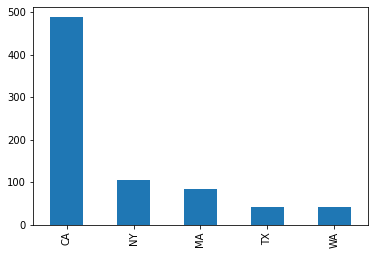

In [9]:
data.state_code.value_counts().head().plot(kind="bar")

C:\Users\Vaibhav\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='funding_rounds', ylabel='count'>

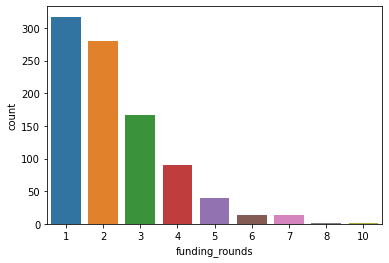

In [10]:
sns.countplot(data.funding_rounds)

<AxesSubplot:>

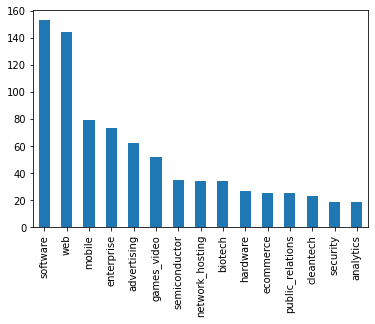

In [11]:
data.category_code.value_counts().head(15).plot(kind="bar")

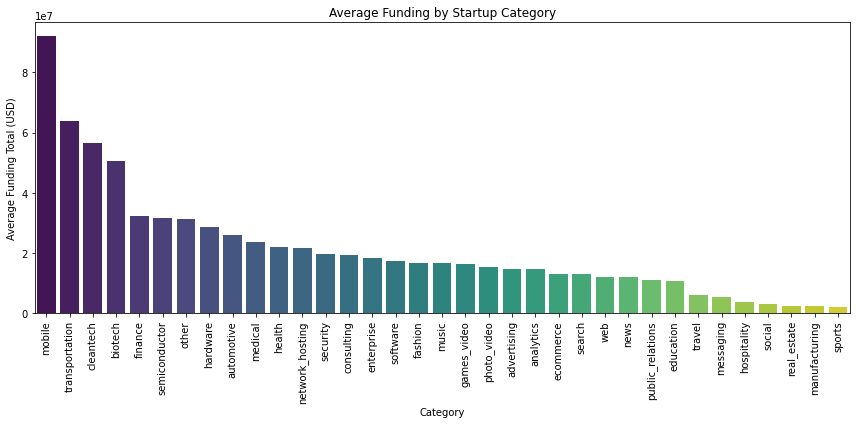

In [12]:
# Calculate the average funding total for each category
category_avg_funding = data.groupby('category_code').mean()['funding_total_usd'].sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=category_avg_funding.index, y=category_avg_funding.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Average Funding Total (USD)')
plt.title('Average Funding by Startup Category')
plt.tight_layout()
plt.show()


<AxesSubplot:ylabel='status'>

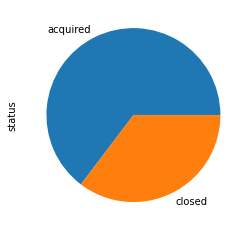

In [13]:
data.status.value_counts().plot(kind="pie") 

#### Insides 
Data consist of 923 rows.
Most startups are from CA state.
Most of the startups are from Software sector.
Mobile Category have higest avg funding.
Around 65% startups are acquired.


### Creating Model and Evaluation

In [14]:
# Feature selection
selected_features = ['funding_total_usd', 'age_first_funding_year', 'age_last_funding_year', 'relationships',
                     'funding_rounds', 'avg_participants', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
                     'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise',
                     'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
                     'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',"status"]
data1=data[selected_features]
data1

,funding_total_usd,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,avg_participants,is_CA,is_NY,is_MA,is_TX,...,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,status
0,375000,2.2493,3.0027,3,3,1.0000,1,0,0,0,...,0,0,1,0,1,0,0,0,0,acquired
1,40100000,5.1260,9.9973,9,4,4.7500,1,0,0,0,...,0,0,0,1,0,0,1,1,1,acquired
2,2600000,1.0329,1.0329,5,1,4.0000,1,0,0,0,...,0,0,0,0,0,1,0,0,0,acquired
3,40000000,3.1315,5.3151,5,3,3.3333,1,0,0,0,...,0,0,0,0,0,0,1,1,1,acquired
4,1300000,0.0000,1.6685,2,2,1.0000,1,0,0,0,...,0,0,0,1,1,0,0,0,0,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,1100000,0.5178,0.5178,9,1,6.0000,1,0,0,0,...,0,0,0,0,0,1,0,0,0,acquired
919,52000000,7.2521,9.2274,1,3,2.6667,0,0,1,0,...,0,0,1,1,0,0,1,0,0,closed
920,44000000,8.4959,8.4959,5,1,8.0000,1,0,0,0,...,1,0,0,0,0,0,0,0,1,closed
921,15500000,0.7589,2.8329,12,2,1.0000,1,0,0,0,...,0,0,0,0,0,1,1,0,0,acquired


In [15]:
data1.isna().sum()

funding_total_usd         0
age_first_funding_year    0
age_last_funding_year     0
relationships             0
funding_rounds            0
avg_participants          0
is_CA                     0
is_NY                     0
is_MA                     0
is_TX                     0
is_otherstate             0
is_software               0
is_web                    0
is_mobile                 0
is_enterprise             0
is_advertising            0
is_gamesvideo             0
is_ecommerce              0
is_biotech                0
is_consulting             0
is_othercategory          0
has_VC                    0
has_angel                 0
has_roundA                0
has_roundB                0
has_roundC                0
has_roundD                0
status                    0
dtype: int64

In [16]:
# Choosing indipendent variables and target variable
X=data1.drop(columns="status")
y=data1["status"]

In [17]:
data1.shape

(923, 28)

In [18]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Accuracy: 76.22%
Classification Report:
              precision    recall  f1-score   support

    acquired       0.81      0.83      0.82       120
      closed       0.67      0.63      0.65        65

    accuracy                           0.76       185
   macro avg       0.74      0.73      0.74       185
weighted avg       0.76      0.76      0.76       185

Confusion Matrix:


<AxesSubplot:>

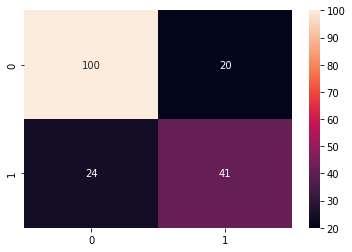

In [19]:
# Model Selection and Training
model = RandomForestClassifier(max_depth= None, min_samples_leaf= 2, min_samples_split= 10, n_estimators= 200)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.5g')
